In [29]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi,deg, cos, sin,atan, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt
from sympy import lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point
from sklearn.metrics import mean_squared_error
from scipy.integrate import cumulative_trapezoid

-----------------------------------------------------------------PUNTO 1---------------------------------------------------------

In [30]:
#variables
theta = dynamicsymbols("theta") #creamos al angulo dinamico, con respecto al tiempo
t = symbols("t") #creamos el tiempo

l = symbols("l") #mm,creamos a la longitud L simbolica

#marcos de referencia
N_fijo = ReferenceFrame("N_fijo")
A_movil = N_fijo.orientnew("A_movil", "Axis", (pi - theta, N_fijo.z)) #El angulo se mide desde el otro eje. Entonces en realidad el angulo es 180 - valor angulo


#Ahora bien, hasta aqui solo hemos llegado a A
#Necesitamos llegar a la punta de A, entonces por eso le podemos sumar el radio en Y, que representa al punto mas alto de la rueda, cualquiera que sea ese punto (que cambia todo el tiempo)

#Ahora si, ya podemos llegar a la punta:
radio = symbols("r") #mm
vector_pos = (l)*A_movil.x + radio*N_fijo.y #que depende del sistema A y del sistema B

#Ahora bien, notamos que el vector de posicion que tenemos va a comportarse igual en terminos de aceleracion que el B, luego

velocidad_vector_pos = vector_pos.diff(t,N_fijo)
aceleracion_vector_pos = velocidad_vector_pos.diff(t, N_fijo)

aceleracion_vector_pos.simplify()
print("Verificacion de la posición:")
display(vector_pos.express(N_fijo))

print("Aceleracion es: ")
display(aceleracion_vector_pos.simplify())

Verificacion de la posición:


- l*cos(theta(t))*N_fijo.x + (l*sin(theta(t)) + r)*N_fijo.y

Aceleracion es: 


l*(sin(theta(t))*Derivative(theta(t), (t, 2)) + cos(theta(t))*Derivative(theta(t), t)**2)*N_fijo.x + l*(-sin(theta(t))*Derivative(theta(t), t)**2 + cos(theta(t))*Derivative(theta(t), (t, 2)))*N_fijo.y

In [31]:
#Ahora para el problema en particular:
#Recordemos que un slider no tiene componente X de aceleracion (asumido) por lo que solo nos importa la y
#La componente y de la aceleracion la podemos hallar con producto punto

display(aceleracion_vector_pos.subs({
    theta: np.deg2rad(60),
    theta.diff(t): 4, 
    theta.diff(t,2):8,
    l:0.080,
    radio:0.020}).dot(N_fijo.y).simplify())

-0.788512516844081

-----------------------------------------------------------------PUNTO 2---------------------------------------------------------

In [32]:
#A. Describir la posicion de las barras con vectores
#Podemos crear un eje fijo en O:
#Ahora creamos al angulo y el tiempo
eje_fijo_O = ReferenceFrame("eje_fijo_O")
theta = dynamicsymbols("theta") #creamos al angulo dinamico, con respecto al tiempo
t = symbols("t") #creamos el tiempo
#Podemos tener

#Creamos la distancia entre deslizadores
x = symbols("x")
#Creamos la longitud de las barras
b = symbols("b")

#Creamos un marco de referencia movil para cada barra
eje_movil_C = eje_fijo_O.orientnew("eje_movil_C", "Axis", (theta, eje_fijo_O.z))   
eje_movil_D = eje_fijo_O.orientnew("eje_movil_D", "Axis", (pi -theta, eje_fijo_O.z)) #el angulo que mide C. El angulo de elevancion de C tambien es theta por el teorema del seno, solo que su angulo medido desde el eje Fijo es 180 - angulo
#Creamos los vectores posicion
vector_pos_O = b*eje_movil_C.x
vector_pos_C = b*eje_movil_D.x 

display(vector_pos_C.express(eje_fijo_O).simplify())
display(vector_pos_O.express(eje_fijo_O).simplify())

- b*cos(theta(t))*eje_fijo_O.x + b*sin(theta(t))*eje_fijo_O.y

b*cos(theta(t))*eje_fijo_O.x + b*sin(theta(t))*eje_fijo_O.y

In [33]:
#B
velocidad_C = vector_pos_C.diff(t, eje_fijo_O).simplify()
velocidad_C

b*sin(theta(t))*Derivative(theta(t), t)*eje_fijo_O.x + b*cos(theta(t))*Derivative(theta(t), t)*eje_fijo_O.y

In [34]:
#C
aceleracion_C = velocidad_C.diff(t, eje_fijo_O).simplify()
aceleracion_C

b*(sin(theta(t))*Derivative(theta(t), (t, 2)) + cos(theta(t))*Derivative(theta(t), t)**2)*eje_fijo_O.x + b*(-sin(theta(t))*Derivative(theta(t), t)**2 + cos(theta(t))*Derivative(theta(t), (t, 2)))*eje_fijo_O.y

-----------------------------------------------------------------PUNTO 3---------------------------------------------------------

In [35]:
#Crear el marco de referencia fijo y el angulo y el tiempo
fijo_3 = ReferenceFrame("fijo_3")
theta = dynamicsymbols("theta") #creamos al angulo dinamico, con respecto al tiempo
t = symbols("t") #creamos el tiempo
#Crear marco de referencia movil
movil_3 = fijo_3.orientnew("movil_3", "Axis", (theta, fijo_3.z))
#Crear vector posicion hacia A
b = symbols("b")
distancia_r = b/cos(theta)  #r cambia con respecto al angulo
vector_pos_3 = distancia_r*movil_3.x
#Crear vector desde el origen hasta la base de todo el objeto derecho
vector_base = b*fijo_3.x

#Crear vector de la altura y, el cual es la 
#Podemos hacer una suma de todos: 
#Vector de OA + Vector A al piso + Vector del piso a O = 0
#Luego Vector A al piso (y) = -vector OA (vector_pos_3) - vector del piso a O (vector_base)
vector_altura_y = vector_pos_3 - vector_base

#Derivar para obtener la velocidad
vector_velocidad_y = vector_altura_y.diff(t, fijo_3)
#Derivar otra vez para obtener aceleracion
vector_aceleracion_y = vector_velocidad_y.diff(t, fijo_3)

vector_aceleracion_y.simplify()

b*(2*sin(theta(t))*Derivative(theta(t), t)**2 + cos(theta(t))*Derivative(theta(t), (t, 2)))/cos(theta(t))**3*fijo_3.y

-----------------------------------------------------------------PUNTO 4---------------------------------------------------------

In [36]:
#Definicion de simbolos
l = symbols("l")  #longitud de las piezas rojas
h_c = symbols("h_c") #altura del cilindro (height cylinder) #esta es constante

n_vueltas = symbols("n_vueltas")
l_punto = symbols("l_punto") #este valor significa que el tornilo baja o sube 1.25 mm por cada vuelta que se le da. por ahora solo lo pondremos sin reemplazar el valor
#este valor es el mismo que lo que cambian de altura las piezas rojas

#El volumen de un cilindro es pi*r^2*h
#Siendo r el radio (que se encuentra en termino de las piezas rojas)
#Y h la altura, que tambien se encuentra en termino de las piezas rojas

# #Definir la altura de las piezas_rojas
#Para esto podemos usar que si giramos el tornillo en cierta direccion, entonces empezara a abrirse el flotador
#De esta forma, se disminuye la altura de las piezas rojas, por tanto:
altura_piezas_rojas = l - l_punto*n_vueltas 

#Definir el radio 
#El radio se encuentra en funcion de la longitud de las piezas rojas y del angulo al que estas se encuentren
#El angulo en que estas encuentren está directamente relacionado con triángulo isosceles entre la altura las piezas rojas y las mitades de las piezas rojas

#Por tanto, podemos hallar el radio con el teorema de pitágoras
#En particular, podemos observar un triangulo rectangulo en la tercera imagen del taller, en la que las piezas rojas forman una X
#El triángulo rectángulo se forma con una de las diagonales de la X siendo la hipotenusa y los catetos son la protección de esa diagonal sobre el eje X e Y
#La proyección de esa diagonal sobre el eje Y termina siendo coincidencialmente la altura de las piezas rojas, anteriormente calculada
#Por tanto, tenemos que:
# c^2 = a^2 + b^2
# l^2 (longitud pieza roja) = altura_cilindro^2 + (radio)^2
#Luego, despejando el radio:
# radio = raiz(l**2 - altura_cilindro**2)
#Por tanto:
radio_cilindro = sqrt(l**2 - altura_piezas_rojas**2)
#De esta forma:
volumen = pi*h_c*radio_cilindro**2
display(volumen)

pi*h_c*(l**2 - (l - l_punto*n_vueltas)**2)

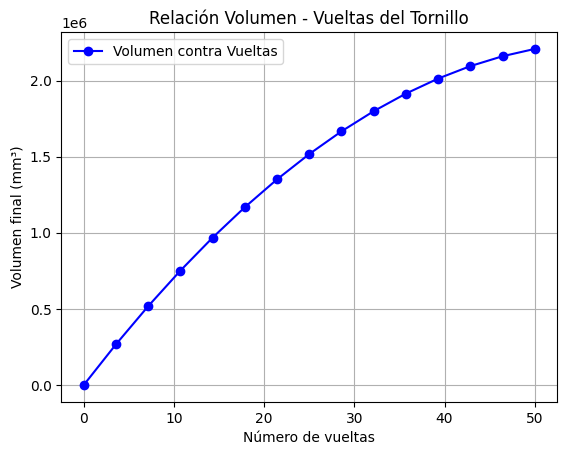

In [37]:
#Ahora podemos hacer la gráfica, usando lambdify
#Paso 1: Construir la expresion
#En nuestro caso, es simplemente una sustitucion con subs del volumen 
parametros = {
    h_c:134.7, #mm, de acuerdo con el cad
    l: 73,        # Longitud de las piezas rojas (mm)
    l_punto: 1.25, # mm por vuelta
}
#luego creamos la expresion:
volumen_exp = volumen.subs(parametros)
#Paso 2: Crear la calculadora, 
#Podemos observar que con el sbus lo único no definido es el número de vueltas y sobre este valor vamos a iterar
#Se comportará este valor como nuestro tiempo. Ahora bien, para usar lambdify introducimos listas de los valores a iterar (n_vueltas) y sobre las expresiones que se usaran (volumen_exp)
calculadora = lambdify([n_vueltas], [volumen_exp], "numpy")

#Paso 3: Recorrer los valores a iterar
#Creamos listas vacias para los valores de x y y de la grafica
x_vals = []
y_vals = []
for num in np.linspace(0,50,15):
    volumen_numerico = calculadora(num)
    x_vals.append(num)
    y_vals.append(volumen_numerico[0])

# Graficar los puntos y conectarlos
plt.plot(x_vals, y_vals, "o-", color="blue", label="Volumen contra Vueltas")  
plt.ylabel("Volumen final (mm³)")
plt.xlabel("Número de vueltas")
plt.title("Relación Volumen - Vueltas del Tornillo")
plt.grid(True)
plt.legend()
plt.show()